In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mindfactory_done.csv")

In [3]:
df.head()

,name,price_eur,display_inch,display_cm,display_resolution,display_ratio,weight_kg,height_mm,width_mm,depth_mm,...,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth,bluetooth_version,wifi_standard,product_ean,product_sku,release_year,category
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,2560x1600,16:9,1.29,16.1,304.1,212.4,...,True,False,True,True,5.0,Wi-Fi 6 (802.11ax),1.942521e+11,MGN63D/A,2020.0,Notebooks
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,3840x2160,16:9,2.80,20.1,397.6,283.5,...,True,True,True,True,5.3,Wi-Fi 6E (802.11ax),4.711377e+12,0017P2-013,NaN,Notebooks
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,2880x1800,NaN,1.60,17.9,314.0,227.5,...,True,False,True,True,5.2,Wi-Fi 6E (802.11ax),4.719073e+12,0014F1-049,NaN,Notebooks
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,NaN,4.719332e+12,AORUS 15 9KF-E3DE383SH,NaN,Notebooks
4,Fujitsu Lifebook A3511 FHD i3-1115G4 8GB 256GB...,354.97,15.6,39.6,1920x1080,NaN,1.95,23.9,361.0,244.0,...,False,True,True,True,5.1,Wi-Fi 6E (802.11ax),4.065221e+12,FPC04902BS,NaN,Notebooks


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 764 non-null    object 
 1   price_eur            764 non-null    float64
 2   display_inch         763 non-null    float64
 3   display_cm           628 non-null    float64
 4   display_resolution   628 non-null    object 
 5   display_ratio        454 non-null    object 
 6   weight_kg            616 non-null    float64
 7   height_mm            627 non-null    float64
 8   width_mm             627 non-null    float64
 9   depth_mm             627 non-null    float64
 10  operating_system     626 non-null    object 
 11  cpu_processor        628 non-null    object 
 12  ram_memory           627 non-null    float64
 13  gpu_integrated       617 non-null    object 
 14  gpu_extra            131 non-null    object 
 15  internal_storage_gb  618 non-null    flo

In [5]:
df.columns

Index(['name', 'price_eur', 'display_inch', 'display_cm', 'display_resolution',
       'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
       'operating_system', 'cpu_processor', 'ram_memory', 'gpu_integrated',
       'gpu_extra', 'internal_storage_gb', 'storage_type', 'battery_life_h',
       'battery_capacity_wh', 'psu_watts', 'audio_system', 'speakers_count',
       'has_touchscreen', 'keyboard_backlit', 'keyboard_numpad', 'has_webcam',
       'has_bluetooth', 'bluetooth_version', 'wifi_standard', 'product_ean',
       'product_sku', 'release_year', 'category'],
      dtype='object')

In [6]:
df_copy = df.copy()

In [7]:
laptops = df_copy[['name', 'price_eur', 'display_inch', 'display_resolution',
         'weight_kg','operating_system', 'cpu_processor', 
        'ram_memory', 'gpu_integrated','internal_storage_gb', 'storage_type',
         'battery_capacity_wh', 'has_webcam','has_bluetooth', 'wifi_standard']]

## DATA CLEANING :

In [8]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 764 non-null    object 
 1   price_eur            764 non-null    float64
 2   display_inch         763 non-null    float64
 3   display_resolution   628 non-null    object 
 4   weight_kg            616 non-null    float64
 5   operating_system     626 non-null    object 
 6   cpu_processor        628 non-null    object 
 7   ram_memory           627 non-null    float64
 8   gpu_integrated       617 non-null    object 
 9   internal_storage_gb  618 non-null    float64
 10  storage_type         627 non-null    object 
 11  battery_capacity_wh  580 non-null    float64
 12  has_webcam           764 non-null    bool   
 13  has_bluetooth        764 non-null    bool   
 14  wifi_standard        627 non-null    object 
dtypes: bool(2), float64(6), object(7)
memory

In [9]:
#column as no information so drop it:
laptops[laptops['display_inch'].isnull()] 

#drop row with index:
laptops = laptops.drop(754)

In [10]:
null_display = laptops[laptops['display_resolution'].isnull()]

In [11]:
#list of index
index_list = null_display.index.tolist()

#drop the rows
laptops = laptops.drop(index_list) 

#'drop = true' to drop  old index
laptops = laptops.reset_index(drop=True)

## CHECK DUPLICATE ROWS :

In [12]:
duplicate_rows = laptops[laptops.duplicated(['name'])]

In [13]:
laptops = laptops.drop(duplicate_rows.index)

#drop row 226 because it is duplicate:
laptops = laptops.drop(226)

laptops = laptops.reset_index(drop=True)

In [14]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 623 non-null    object 
 1   price_eur            623 non-null    float64
 2   display_inch         623 non-null    float64
 3   display_resolution   623 non-null    object 
 4   weight_kg            611 non-null    float64
 5   operating_system     620 non-null    object 
 6   cpu_processor        622 non-null    object 
 7   ram_memory           621 non-null    float64
 8   gpu_integrated       612 non-null    object 
 9   internal_storage_gb  613 non-null    float64
 10  storage_type         622 non-null    object 
 11  battery_capacity_wh  575 non-null    float64
 12  has_webcam           623 non-null    bool   
 13  has_bluetooth        623 non-null    bool   
 14  wifi_standard        622 non-null    object 
dtypes: bool(2), float64(6), object(7)
memory

In [15]:
laptops[laptops['wifi_standard'].isnull()]

,name,price_eur,display_inch,display_resolution,weight_kg,operating_system,cpu_processor,ram_memory,gpu_integrated,internal_storage_gb,storage_type,battery_capacity_wh,has_webcam,has_bluetooth,wifi_standard
540,LENOVO ThinkVision M14d QHD 16:10 IPS 300nits ...,278.97,14.0,2240x1400,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN


In [16]:
laptops = laptops.drop([540])

In [17]:
laptops = laptops.reset_index(drop=True)

In [18]:
laptops.iloc[413,7] = 8.0
laptops.iloc[413,8] = 'Andreno 618 Graphics'
laptops.iloc[413,11] = 46.7

In [19]:
laptops.iloc[142,4] = 2.08
laptops.iloc[142,11] = 60.0
laptops.iloc[149,4] = 1.18
laptops.iloc[194,4] = 0.88
laptops.iloc[212,4] = 0.99
laptops.iloc[225,4] = 0.99
laptops.iloc[265,4] = 1.13
laptops.iloc[337,4] = 1.37
laptops.iloc[412,4] = 1.19
laptops.iloc[459,4] = 1.19
laptops.iloc[463,4] = 1.19
laptops.iloc[596,4] = 2.08
laptops = laptops.drop(599)#duplicate so drop it

In [20]:
laptops.iloc[3,5] = 'windows 10 pro'
laptops.iloc[165,5] = 'MacOS'

In [21]:
laptops.dropna(inplace=True)

In [22]:
laptops = laptops.reset_index(drop=True)

In [23]:
laptops.describe()

,price_eur,display_inch,weight_kg,ram_memory,internal_storage_gb,battery_capacity_wh
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,1754.406204,14.452548,14.999912,21.736380,399.485062,61.062127
std,949.331857,1.931831,112.276664,83.792799,376.240484,14.830148
min,276.800000,0.000000,0.880000,4.000000,1.000000,36.000000
25%,1091.940000,14.000000,1.300000,16.000000,128.000000,52.500000
50%,1575.220000,14.000000,1.520000,16.000000,512.000000,57.000000
75%,2084.280000,15.600000,1.810000,16.000000,512.000000,65.000000
max,6130.110000,17.300000,990.000000,2000.000000,2000.000000,100.000000


In [24]:
max_weight = laptops[laptops['weight_kg'] == laptops['weight_kg'].max()]
max_weight_indices = max_weight.index.tolist()
laptops.iloc[max_weight_indices,4] = 0.99

In [25]:
laptops.iloc[52,4] = 0.91
laptops.iloc[190,4] = 0.89
laptops.iloc[279,4] = 0.97
laptops.iloc[290,4] = 0.91

In [26]:
laptops.iloc[378,7] = 64 # update the crt RAM

In [27]:
df.to_csv('cleansed_data.csv',index=False)

## EDA & STATISTICAL BASED ANALYSIS :


Top 10 expensive laptops:

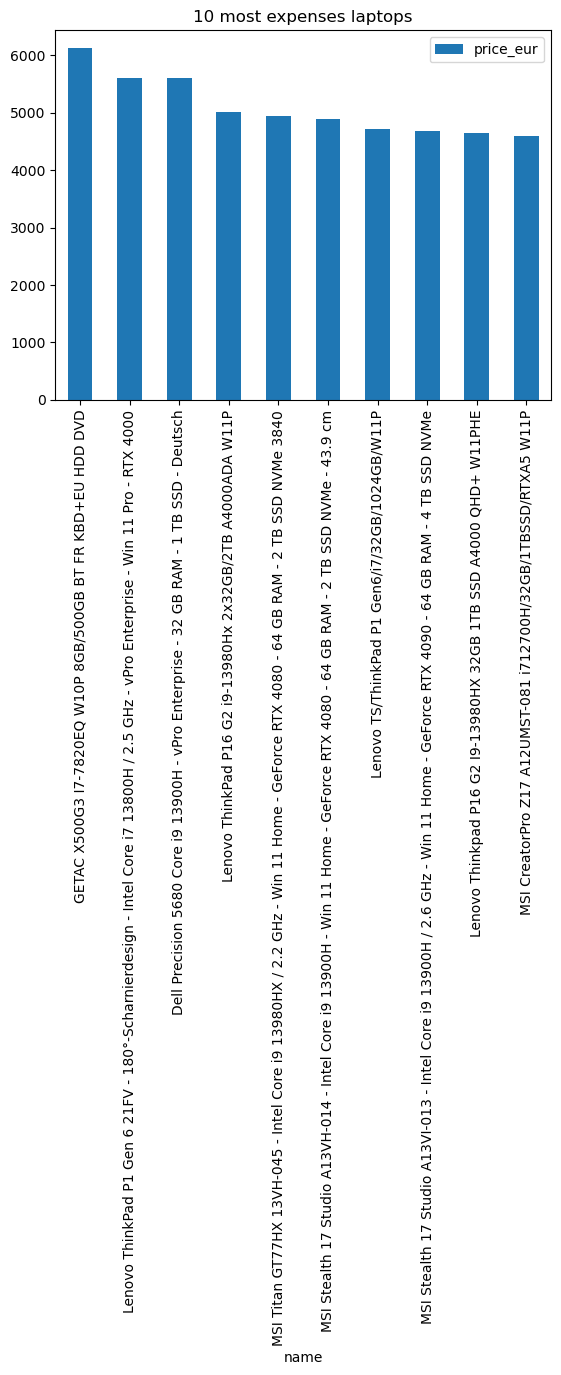

In [30]:
top_10 = laptops.nlargest(10,columns=['price_eur'])
top_10.plot(kind='bar', x='name', y='price_eur', title='10 most expenses laptops');

10 LEAST EXPENSIVE LAPTOPS:

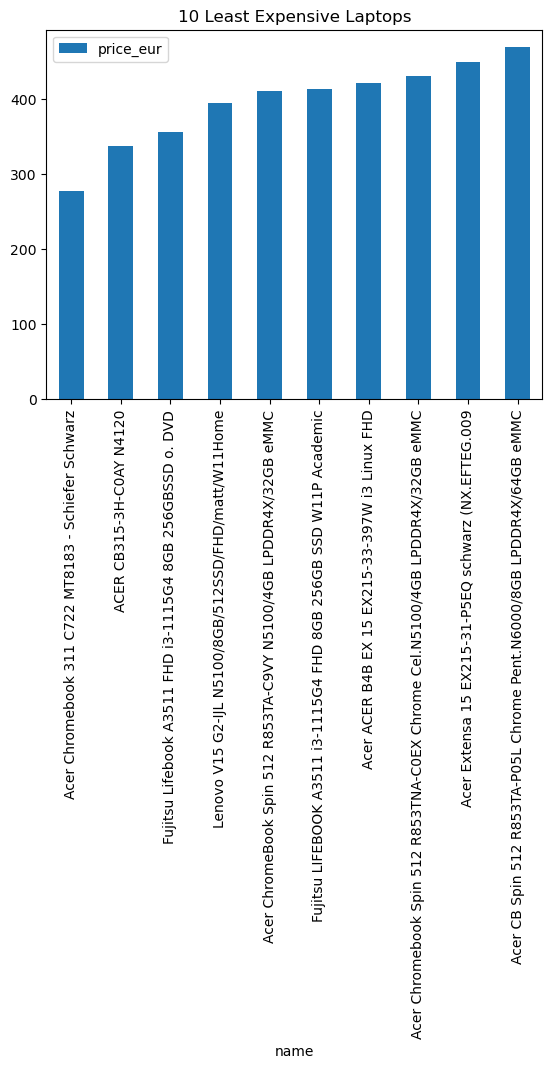

In [33]:
least_10 = laptops.nsmallest(10,columns=['price_eur'])
least_10.plot.bar(x='name',y='price_eur',title='10 Least Expensive Laptops');

## Largest screen size

In [35]:
max_display = laptops['display_inch'].max()
laptops[laptops['display_inch'] == max_display]

,name,price_eur,display_inch,display_resolution,weight_kg,operating_system,cpu_processor,ram_memory,gpu_integrated,internal_storage_gb,storage_type,battery_capacity_wh,has_webcam,has_bluetooth,wifi_standard
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,3840x2160,2.80,Windows 11 Home,i9-13900H,64.0,Intel Iris Xe Graphics,4.0,SSD,99.0,True,True,Wi-Fi 6E (802.11ax)
17,LG GRAM 17Z90Q-G.AP78G i7 W11P FHD black,1266.53,17.3,2560x1600,1.35,Windows 11 Pro,i7-1260P,16.0,Intel Iris Xe Graphics,1000.0,SSD,80.0,True,True,Wi-Fi 6E (802.11ax)
153,MSI Pulse 17 B13VGK-068 - Intel Core i7 13700H...,2409.90,17.3,1920x1080,2.70,Windows 11 Home,i7-13700H,16.0,Intel Iris Xe Graphics,1.0,SSD,90.0,True,True,Wi-Fi 6 (802.11ax)
154,"Gigabyte AORUS 17X AXF-D4DE694SH 17,3 i9 W11 2...",3489.99,17.3,2560x1440,2.80,Windows 11 Home,i9-13980HX,16.0,Intel® UHD Graphics,1000.0,SSD,99.0,True,True,Wi-Fi 6E (802.11ax)
169,"MSI Raider GE78 HX 13VG (RTX 4070, GDDR6 8GB",3671.47,17.3,2560x1600,3.10,Windows 11 Home,Intel HM770,32.0,Intel® UHD Graphics,2.0,SSD,99.0,True,True,Wi-Fi 6E (802.11ax)
192,MSI Titan GT77HX 13VH-045 - Intel Core i9 1398...,4935.13,17.3,3840x2160,3.30,Windows 11 Home,Intel HM770,64.0,Intel® UHD Graphics,2.0,SSD,99.0,True,True,Wi-Fi 6E (802.11ax)
248,"MSI Stealth 17 A13VF (RTX 4060, GDDR6 8GB",2946.08,17.3,2560x1440,2.80,Windows 11 Home,i7-13700H,16.0,Intel Iris Xe Graphics,2.0,SSD,99.0,True,True,Wi-Fi 6E (802.11ax)
269,MSI Stealth 16 Studio A13VF-075 - Intel Core i...,2960.98,17.3,2560x1600,1.99,Windows 11 Home,i7-13700H,16.0,Intel Iris Xe Graphics,2.0,SSD,99.9,True,True,Wi-Fi 6E (802.11ax)
359,LENOVO V17 G3 Intel Core i5-1235U FHD 16GB 512...,915.68,17.3,1920x1080,2.20,Windows 11 Pro,Intel SoC,16.0,Intel® UHD Graphics,512.0,SSD,45.0,True,True,Wi-Fi 6 (802.11ax)
406,Acer Aspire 5 A517-52 Core i5 1135G7 - 8 GB RA...,706.50,17.3,1920x1080,2.30,Linux,Intel SoC,8.0,Intel Iris Xe Graphics,256.0,SSD,50.0,True,True,Wi-Fi 6E (802.11ax)


## laptops are heaviest


In [36]:
laptops[laptops['weight_kg']==laptops['weight_kg'].max()]

,name,price_eur,display_inch,display_resolution,weight_kg,operating_system,cpu_processor,ram_memory,gpu_integrated,internal_storage_gb,storage_type,battery_capacity_wh,has_webcam,has_bluetooth,wifi_standard
563,GETAC X500G3 I7-7820EQ W10P 8GB/500GB BT FR KB...,6130.11,15.6,1920x1080,5.2,Windows 10 Pro,i7-7820EQ,8.0,Intel® HD Graphics 630,500.0,HDD,99.8,False,True,Wi-Fi 5 (802.11ac)


## Unique relationship between columns :

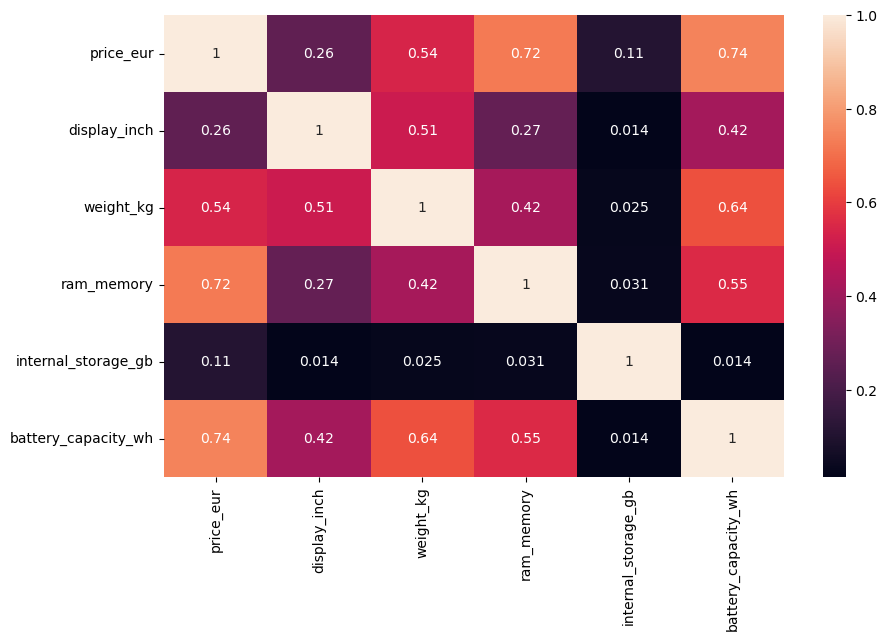

In [39]:
numerical_columns = laptops.select_dtypes(include='number')
plt.figure(figsize=[10,6])
sns.heatmap(numerical_columns.corr(),annot=True);

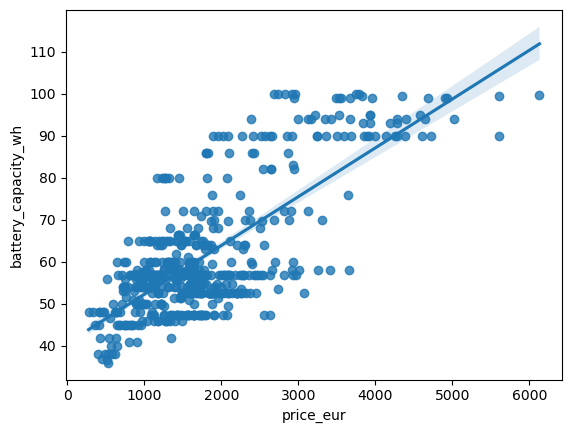

In [42]:
sns.regplot(data=laptops,x='price_eur',y='battery_capacity_wh');

## storage type predominant:

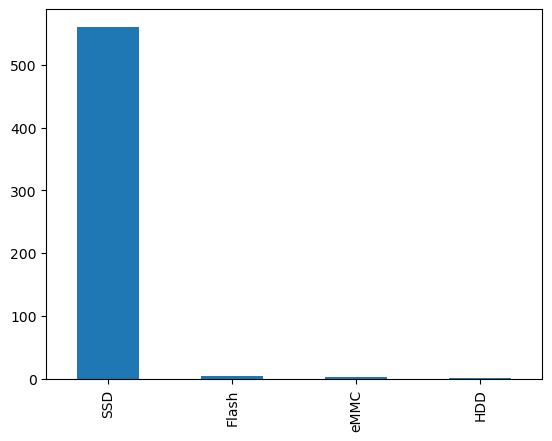

In [43]:
laptops['storage_type'].value_counts().plot.bar();

## percentage of laptops have bluetooth and webcam :

In [44]:
with_bluetooth_webcam = laptops[(laptops['has_bluetooth'] == True) & (laptops['has_webcam'] ==True)]
total_laptops = laptops.shape[0]
(with_bluetooth_webcam.shape[0]/total_laptops)*100

97.36379613356766

## percentage of laptops have webcam but no bluetooth:

In [48]:
no_bluetooth_with_webcam = laptops[(laptops['has_bluetooth'] == False) & (laptops['has_webcam'] == True)]
total_laptops = laptops.shape[0]
(no_bluetooth_with_webcam.shape[0]/total_laptops)*100

0.0

## Percentage of laptops are apple products :


In [52]:
apple_products = laptops[laptops['operating_system'].str.contains('mac',case=False)]
(apple_products.shape[0]/laptops.shape[0])*100                         

10.193321616871705

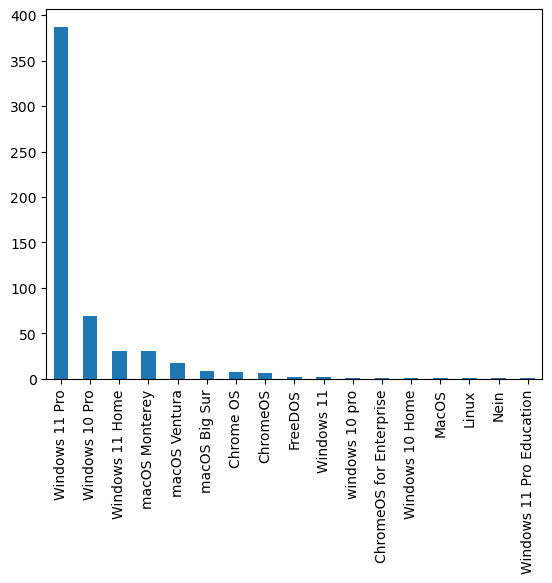

In [54]:
laptops['operating_system'].value_counts().plot.bar();